In [1]:
import pandas as pd
from numpy import random
from sklearn.preprocessing import StandardScaler

resultados_exames = pd.read_csv("exames.csv")

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())
valores_exames_v3 = valores_exames_v2.drop(columns= ["exame_4","exame_29"])
matriz_correlacao = valores_exames_v3.corr()
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

Resultado da classificação 92.98%


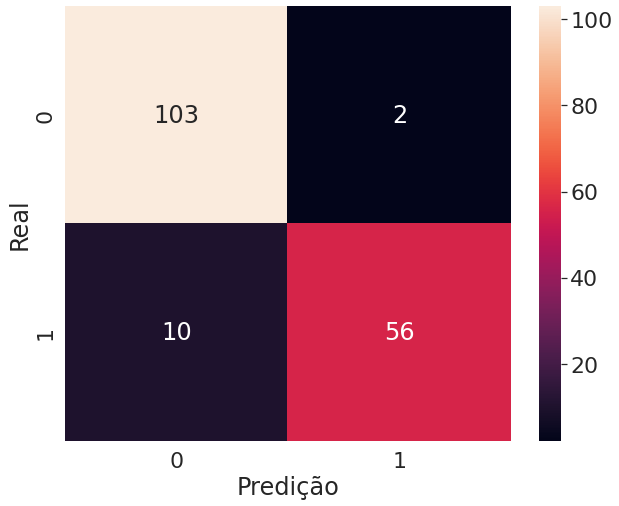

In [2]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

In [3]:
selecionador_rfecv.n_features_

26

In [4]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


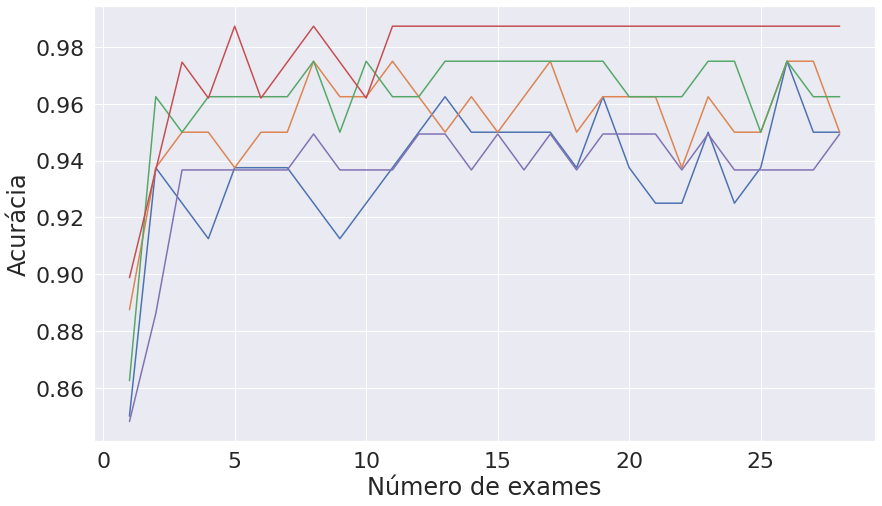

In [5]:
plt.figure(figsize = (14,8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show()

In [6]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

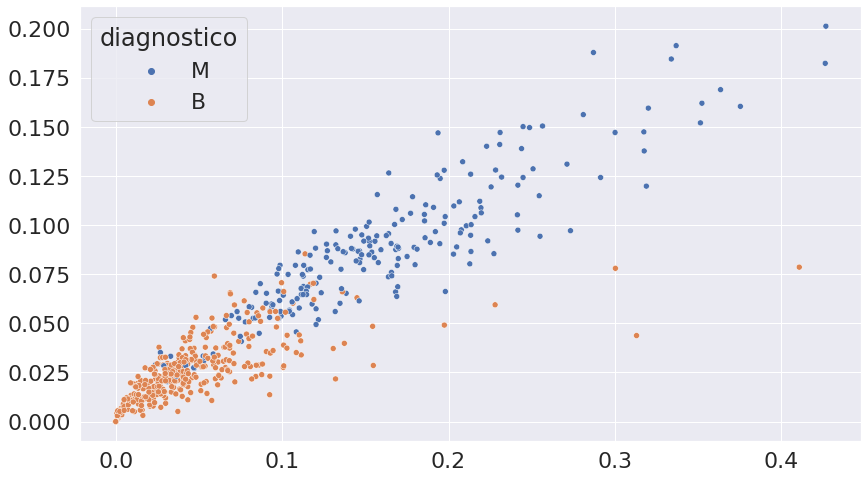

In [7]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1] , hue = diagnostico)

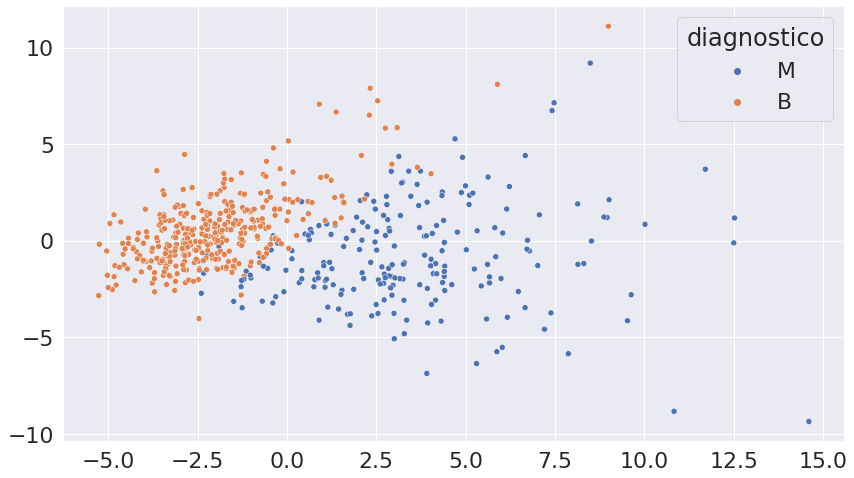

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1] , hue = diagnostico)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


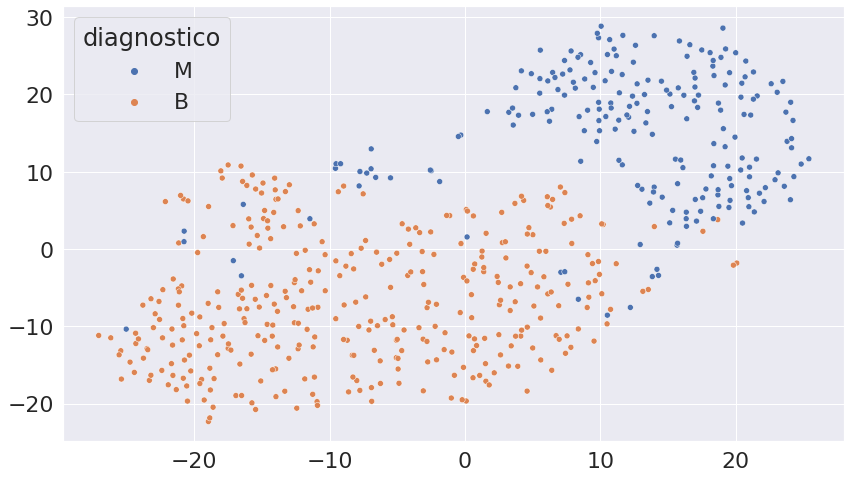

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize = (14,8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1] , hue = diagnostico)